# 2015 Elections

# Imports

In [1]:
!pip install --upgrade git+https://github.com/goolig/dsClass.git

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-3gas6qb_
  Running command git clone --filter=blob:none -q https://github.com/goolig/dsClass.git /tmp/pip-req-build-3gas6qb_
  Resolved https://github.com/goolig/dsClass.git to commit 67567d1d71a8a747c8a68c621045fe53ff139103
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 278 kB 4.3 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for dsClass: filename=dsClass-1.0.27-py3-none-any.whl size=16372733 sha256=010ebf2bc315260cb871fdedce409bab03e2776400cdd4a7be2acc43eda682fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ltniuvy/wheels/cc/7d/ca/f5036d591d94a23e6ab49777866b7fc723500ce0dcdb2a9b2e
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=ee5ac2105627ff223c371ec91414637162c530bce254555b09fa0a276b2882d1
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successful

In [2]:
import pandas as pd
import itertools
from datetime import timedelta
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns
sns.set_context("poster")

import plotly.express as px
import numpy as np
import math

import datetime
import time
import sys



import sklearn


import pylab as pl
import matplotlib.dates as mdates


from dsClass.path_helper import *

# Data Import

הנתונים אשר קיבלתם מכילים את ריכוז תוצאות הבחירות עבור הבחירות לכנסת לישראל בשנת 2015. כל רשומה מתארת את התוצאות של קלפי אחד. הקלפי מזוהה לפי מזהה הישוב ומספר הקלפי. שם הישוב ניתן גם בעברית ובאנגלית. מלבד זאת עבור כל רשומה ידוע כמה מצביעים רשומים עבורה קיימים, כמה הצבעות היו בפועל, כמה הצבעות נפסלו, כמה הצבעות חוקיות התבצעו בקלפי זו, ושאר השדות מתארים את כמות הקולות עבור כל מפלגה.

In [3]:
file_name = get_file_path("results_by_booth_2015 - english - v3_utf8.csv")
result_df = pd.read_csv(file_name,delimiter=',')
print("Columns:")
print(result_df.columns)
print()
print("df shape:",result_df.shape)
result_df.tail(5)

Columns:
Index(['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english',
       'Booth_number', 'Registered_voters', 'votes', 'bad_votes',
       'proper_votes', 'Ale Yarok', 'Arab List', 'Democratura', 'Green Party',
       'Haim Bekavod', 'Hope for change', 'Joint List', 'Kalkala', 'Kulanu',
       'Likud', 'Meretz', 'Moreshet Avot', 'Na Nach',
       'National Team (temporary)', 'Or', 'Perach', 'Pirate Party', 'Shas',
       'The Jewish Home', 'Ubizchutan', 'United Torah Judaism', 'Yachad',
       'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union'],
      dtype='object')

df shape: (10414, 33)


,Settlement_name_hebrew,Settlement_code,settlement_name_english,Booth_number,Registered_voters,votes,bad_votes,proper_votes,Ale Yarok,Arab List,...,Perach,Pirate Party,Shas,The Jewish Home,Ubizchutan,United Torah Judaism,Yachad,Yesh Atid,Yisrael Beiteinu,Zionist Union
10409,תקוע,3563,TEQOA,2.0,476,369,1,368,3,0,...,0,0,2,144,2,7,32,4,13,9
10410,תקוע,3563,TEQOA,3.0,645,533,0,533,9,0,...,0,0,5,265,2,3,48,4,14,6
10411,תראבין א-צאנע (שב,970,TARABIN AS-SANI,1.0,639,106,0,106,0,5,...,0,0,2,0,0,0,0,0,0,2
10412,תראבין א-צאנע(ישו,1346,TARABIN AS-SANI,1.0,176,60,0,60,0,3,...,0,0,3,1,0,1,0,0,0,1
10413,תרום,778,TARUM,1.0,482,411,2,409,5,0,...,0,0,37,111,0,4,24,13,1,23


# Clean Data

In [4]:
result_df.isnull().sum()

Settlement_name_hebrew       0
Settlement_code              0
settlement_name_english      0
Booth_number                 0
Registered_voters            0
votes                        0
bad_votes                    0
proper_votes                 0
Ale Yarok                    0
Arab List                    0
Democratura                  0
Green Party                  0
Haim Bekavod                 0
Hope for change              0
Joint List                   0
Kalkala                      0
Kulanu                       0
Likud                        0
Meretz                       0
Moreshet Avot                0
Na Nach                      0
National Team (temporary)    0
Or                           0
Perach                       0
Pirate Party                 0
Shas                         0
The Jewish Home              0
Ubizchutan                   0
United Torah Judaism         0
Yachad                       0
Yesh Atid                    0
Yisrael Beiteinu             0
Zionist 

In [5]:
result_df = result_df.dropna(axis=0, how='any')
result_df = result_df[result_df.votes > 0]
result_df.loc[result_df.Registered_voters == 0,'Registered_voters'] = result_df[result_df.Registered_voters == 0].votes
result_df.shape

(10412, 33)

# Overall Votes Per Party

In [6]:
block_percent = 0.0325

all registerd voters: 6114936
all_votes: 4210884
vote percentage: 0.6886227427400712


<AxesSubplot:>

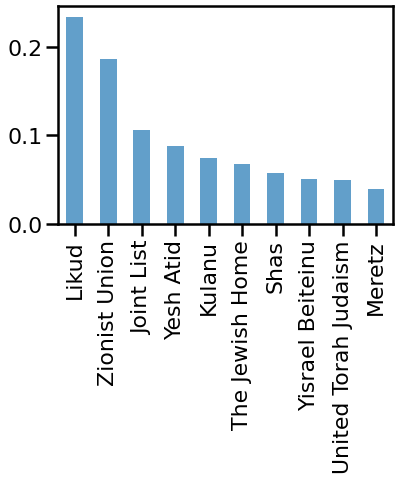

In [7]:
all_registered_voters = result_df.Registered_voters.sum()
all_votes = result_df.proper_votes.sum()
print("all registerd voters:",all_registered_voters)
print("all_votes:",all_votes)
print("vote percentage:",all_votes/all_registered_voters)
overall_votes_per_party = result_df.iloc[:,8:].sum()
percantage_vote_per_pary = overall_votes_per_party/all_votes
percantage_vote_per_pary = percantage_vote_per_pary[percantage_vote_per_pary.values>block_percent]
percantage_vote_per_pary.sort_values(ascending=False).plot.bar(alpha=0.7)

# Group by City and Filter Out Small Parties

In [8]:
# Print the large parties
large_parties = percantage_vote_per_pary.index.values
print(large_parties)

['Joint List' 'Kulanu' 'Likud' 'Meretz' 'Shas' 'The Jewish Home'
 'United Torah Judaism' 'Yesh Atid' 'Yisrael Beiteinu' 'Zionist Union']


In [9]:
non_party_col = list(result_df.iloc[:,0:8].columns)
int_columns = []
int_columns.extend(non_party_col)
int_columns.extend(list(large_parties))
print(int_columns)

['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english', 'Booth_number', 'Registered_voters', 'votes', 'bad_votes', 'proper_votes', 'Joint List', 'Kulanu', 'Likud', 'Meretz', 'Shas', 'The Jewish Home', 'United Torah Judaism', 'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union']


In [10]:
int_columns[4:]

['Registered_voters',
 'votes',
 'bad_votes',
 'proper_votes',
 'Joint List',
 'Kulanu',
 'Likud',
 'Meretz',
 'Shas',
 'The Jewish Home',
 'United Torah Judaism',
 'Yesh Atid',
 'Yisrael Beiteinu',
 'Zionist Union']

In [11]:
res_work_df = result_df.copy()
res_work_df = res_work_df[int_columns]
res_work_df_city = res_work_df.groupby(['settlement_name_english','Settlement_code'])[int_columns[4:]].sum().reset_index()
print(res_work_df_city.shape)
res_work_df_city.head(10)

(1196, 16)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
0,A'SAM,963,4129,1331,25,1306,1055,9,10,9,85,1,4,1,3,80
1,ABBIRIM,1220,160,123,1,122,3,6,9,34,4,0,0,12,1,48
2,ABU ABDUN,958,119,37,1,36,35,0,0,0,0,0,0,0,0,0
3,ABU GHOSH,472,4178,2539,33,2506,2114,21,58,41,35,10,4,14,5,143
4,ABU JUWEI'ID,967,1610,313,7,306,242,1,3,8,2,0,0,1,0,39
5,ABU QUREINAT,968,2685,759,7,752,564,5,8,6,8,2,3,25,1,84
6,ABU QUREINAT,1342,154,65,1,64,50,0,0,0,2,1,0,4,0,4
7,ABU RUBEI'A,966,3502,716,11,705,536,1,10,9,16,0,1,29,0,54
8,ABU RUQAYYEQ,961,4205,1271,10,1261,1112,3,7,30,8,3,1,2,1,31
9,ABU SINAN,473,8363,5798,52,5746,3802,158,255,66,213,10,3,41,799,299


# Remove low votings rates

In [12]:
min_vote_rate = 0.6
min_proper_votes = 300

In [13]:
res_work_df = res_work_df_city.copy()
res_work_df['vote_rate'] = res_work_df.proper_votes / res_work_df.Registered_voters
res_work_df = res_work_df[(res_work_df.vote_rate > min_vote_rate) & (res_work_df.proper_votes > min_proper_votes)]
print(res_work_df.shape)
res_work_df.sample(10)

(724, 17)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
1092,TIRAT ZEVI,268,523,417,2,415,0,15,82,5,0,233,2,34,2,30,0.793499
706,MISHMAR AYYALON,670,386,308,0,308,0,32,75,17,6,18,2,43,9,100,0.797927
360,GIV'AT KOAH,802,610,461,0,461,0,88,153,6,21,42,8,50,8,55,0.755738
233,EIN MAHEL,532,7717,5708,29,5679,5394,3,35,127,59,0,0,1,0,35,0.735908
409,HASOLELIM,677,637,504,1,503,3,25,59,50,3,9,2,75,2,260,0.789639
875,QAZIR,1243,1964,1386,11,1375,8,114,191,143,7,65,3,158,99,537,0.700102
142,BEREKHYA,746,696,596,5,591,0,12,197,0,30,44,3,8,0,6,0.849138
353,GIV'AT AVNI,1293,1612,1203,6,1197,1,123,353,22,33,112,5,200,15,293,0.742556
822,NOQEDIM,3726,922,760,4,756,1,13,213,2,4,296,9,5,119,12,0.819957
588,LIMAN,674,499,391,1,390,0,36,79,6,6,34,1,84,6,130,0.781563


In [14]:
# results in the big cities
res_work_df[res_work_df.settlement_name_english.str.contains("BE'ER SHEVA|TEL AVIV|JERU|HAI")] # BE'ER SHEVA / TEL AVIV / JERUSALEM 

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
119,BE'ER SHEVA,9000,156696,98505,1352,97153,531,8548,36614,1357,6178,6782,676,7364,11721,11887,0.620009
387,HAIFA,4000,243274,151318,1758,149560,12363,12697,31025,6783,3342,8032,4894,16826,12010,37805,0.614780
462,JERUSALEM,3000,385888,258879,3593,255286,3148,11949,61874,10166,30579,21266,53948,10752,6032,24696,0.661555
1071,TEL AVIV - YAFO,5000,403338,263205,1860,261345,8488,17989,47526,34056,10189,8772,2628,30241,5446,89567,0.647955


## Check if there bad rows with infinite values

In [15]:
res_work_df[res_work_df.vote_rate == np.inf]

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate


In [16]:
res_work_df.loc[[648]].iloc[:,7:-1]

,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
648,28,147,49,6,35,3,23,4,83


In [17]:
res_work_df.loc[[648]].iloc[:,6:-1].sum(axis=1)

648    384
dtype: int64

# Calculate percentage votes for each city-party

In [18]:
res_work_df_percentage_votes = res_work_df.iloc[:,6:-1].div(res_work_df.proper_votes, axis=0)
res_work_df_percentage_votes.head(5)

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
9,0.661678,0.027497,0.044379,0.011486,0.037069,0.001740,0.000522,0.007135,0.139053,0.052036
12,0.002625,0.055118,0.506562,0.023622,0.068241,0.204724,0.002625,0.039370,0.026247,0.031496
14,0.000000,0.086876,0.165434,0.035120,0.002773,0.047135,0.000924,0.231054,0.012939,0.400185
16,0.003279,0.029508,0.042623,0.075410,0.006557,0.026230,0.000000,0.111475,0.006557,0.681967
18,0.001385,0.023546,0.024931,0.098338,0.001385,0.029086,0.002770,0.078947,0.011080,0.703601


# Clustering

In [19]:
res_work_df_percentage_votes_transpose = res_work_df_percentage_votes.transpose()
res_work_df_percentage_votes_transpose.head(11)

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,...,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,...,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914
Meretz,0.011486,0.023622,0.035120,0.075410,0.098338,0.009167,0.002358,0.004484,0.001497,0.022018,...,0.092308,0.290155,0.123333,0.168831,0.064665,0.008667,0.092474,0.063623,0.050000,0.060475
Shas,0.037069,0.068241,0.002773,0.006557,0.001385,0.059586,0.370283,0.069507,0.235030,0.022018,...,0.000000,0.000000,0.001667,0.000000,0.000000,0.009751,0.014850,0.005240,0.008696,0.006479
The Jewish Home,0.001740,0.204724,0.047135,0.026230,0.029086,0.057534,0.159198,0.147982,0.023952,0.064220,...,0.052747,0.023316,0.028333,0.016698,0.020785,0.419285,0.071212,0.035180,0.061413,0.049676
United Torah Judaism,0.000522,0.002625,0.000924,0.000000,0.002770,0.018596,0.029481,0.020179,0.020958,0.003670,...,0.004396,0.000000,0.001667,0.001855,0.002309,0.005417,0.004050,0.005240,0.002717,0.004320
Yesh Atid,0.007135,0.039370,0.231054,0.111475,0.078947,0.070063,0.005896,0.024664,0.019461,0.163303,...,0.184615,0.088083,0.151667,0.074212,0.087760,0.061755,0.141073,0.197605,0.230978,0.196544
Yisrael Beiteinu,0.139053,0.026247,0.012939,0.006557,0.011080,0.109525,0.002358,0.006726,0.001497,0.007339,...,0.019780,0.007772,0.008333,0.000000,0.002309,0.013001,0.034425,0.001497,0.016848,0.017279
Zionist Union,0.052036,0.031496,0.400185,0.681967,0.703601,0.110485,0.003538,0.015695,0.038922,0.269725,...,0.441758,0.427461,0.530000,0.641929,0.709007,0.061755,0.273372,0.496257,0.369022,0.520518


## Run K-Means
- Tanspose matrix
- Convert numeric voting rate to (1,0) where 1 means the voting rate in that settelment was above the median

In [20]:
X = res_work_df_percentage_votes_transpose
X.head(3)

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,...,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,...,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914


In [21]:
def above_median(fclist):
    med = np.median(fclist)
    return (fclist > med).astype(int)

X = X.apply(above_median, axis=1)

In [22]:
X[1:10]

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Kulanu,0,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,1,1,1,1,0
Likud,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,0
Meretz,0,0,0,1,1,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
Shas,1,1,0,1,0,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,1
The Jewish Home,0,1,1,0,0,1,1,1,0,1,...,1,0,0,0,0,1,1,0,1,1
United Torah Judaism,0,1,0,0,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
Yesh Atid,0,0,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,1,1,1
Yisrael Beiteinu,1,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
Zionist Union,0,0,1,1,1,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1


In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = km.labels_.tolist()
clusters

[3, 2, 1, 0, 1, 1, 1, 0, 2, 0]

## Visualize Clusters

In [24]:
names = res_work_df_percentage_votes_transpose.index.tolist()
names

['Joint List',
 'Kulanu',
 'Likud',
 'Meretz',
 'Shas',
 'The Jewish Home',
 'United Torah Judaism',
 'Yesh Atid',
 'Yisrael Beiteinu',
 'Zionist Union']

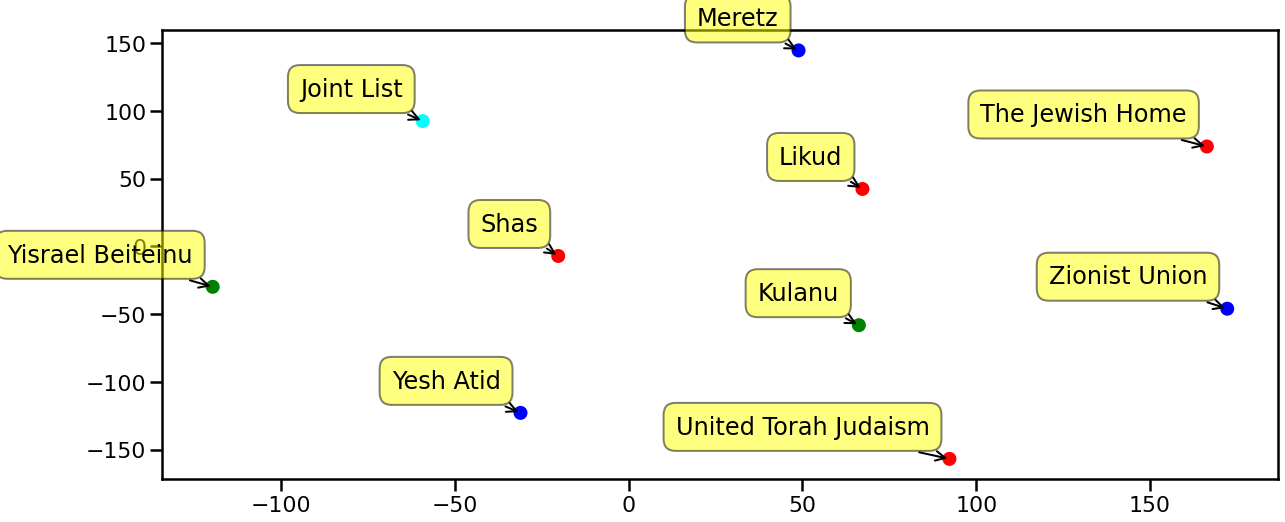

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
results_tsne = tsne.fit(X)

coords = results_tsne.embedding_

colors = ['blue','red','green','cyan','magenta','yellow','black','white']
label_colors = [colors[i] for i in clusters]
plt.figure(figsize=(20,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c=label_colors
    )

#names = distance.index.values.tolist()
for label, x, y in zip(names, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()


# Distance Matrix
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance

In [26]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

x = res_work_df_percentage_votes_transpose

res = pairwise_distances(x, metric='correlation') # cosine / jaccard / correlation / euclidean

distance = pd.DataFrame(res, index=res_work_df_percentage_votes_transpose.index, 
                        columns= res_work_df_percentage_votes_transpose.index)

distance

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
Joint List,0.000000,1.367228,1.349719,1.135943,1.093125,1.190827,1.060608,1.422978,1.086445,1.353393
Kulanu,1.367228,0.000000,0.387466,1.250750,0.821314,1.212273,1.114415,0.670297,0.821421,1.037505
Likud,1.349719,0.387466,0.000000,1.496075,0.600312,0.810013,1.035258,1.096753,0.774399,1.499037
Meretz,1.135943,1.250750,1.496075,0.000000,1.313049,1.351136,1.137316,0.802393,1.169799,0.416618
Shas,1.093125,0.821314,0.600312,1.313049,0.000000,1.032138,0.600705,1.317005,0.860421,1.414061
The Jewish Home,1.190827,1.212273,0.810013,1.351136,1.032138,0.000000,1.032231,1.368666,1.059215,1.496226
United Torah Judaism,1.060608,1.114415,1.035258,1.137316,0.600705,1.032231,0.000000,1.189887,1.009505,1.202599
Yesh Atid,1.422978,0.670297,1.096753,0.802393,1.317005,1.368666,1.189887,0.000000,1.018558,0.373886
Yisrael Beiteinu,1.086445,0.821421,0.774399,1.169799,0.860421,1.059215,1.009505,1.018558,0.000000,1.152551
Zionist Union,1.353393,1.037505,1.499037,0.416618,1.414061,1.496226,1.202599,0.373886,1.152551,0.000000


## Hierarchical Clustering

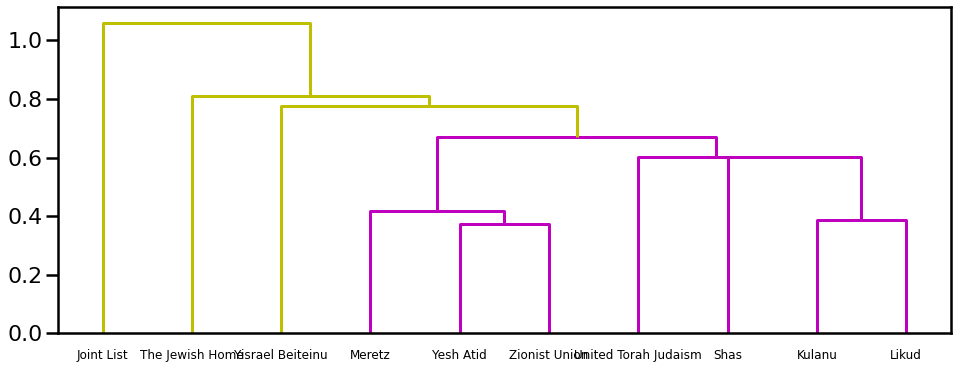

In [27]:
import scipy
from scipy.cluster import hierarchy

labels = distance.index.values.tolist()
sq_distance = scipy.spatial.distance.squareform(distance)

Z = hierarchy.linkage(sq_distance, 'single')
#plt.figure()
#dn = hierarchy.dendrogram(Z)

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top', labels=labels)
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=labels)
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right', labels=labels)
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

## Heatmap of Distance Matrix Reordered as the Dendrogram

In [28]:
new_order_distance = distance.reindex(dn1['ivl'])
new_order_distance = new_order_distance[dn1['ivl']] 

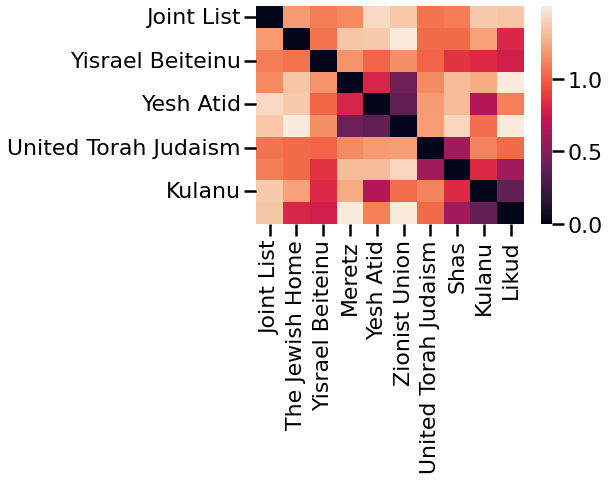

In [29]:
import seaborn as sns
ax = sns.heatmap(new_order_distance)

# Homework - IRIS

In [30]:
from sklearn.datasets import load_iris

In [31]:
def sklearn_to_df(sklearn_dataset,d):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    df['Species']=df['target'].apply (lambda x: d[x])
    return df

In [32]:
import pandas as pd
iris = load_iris()
d = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris=sklearn_to_df(iris,d)

## EDA

In [33]:
iris.head(3)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Q1: Check if there are missing values

In [34]:
iris.isnull().sum()
iris = iris.dropna(axis=0, how='any')
iris
#There are no nulls in the dataSet

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Q2: Create a pair plot and write your insights from the plot

https://seaborn.pydata.org/generated/seaborn.pairplot.html

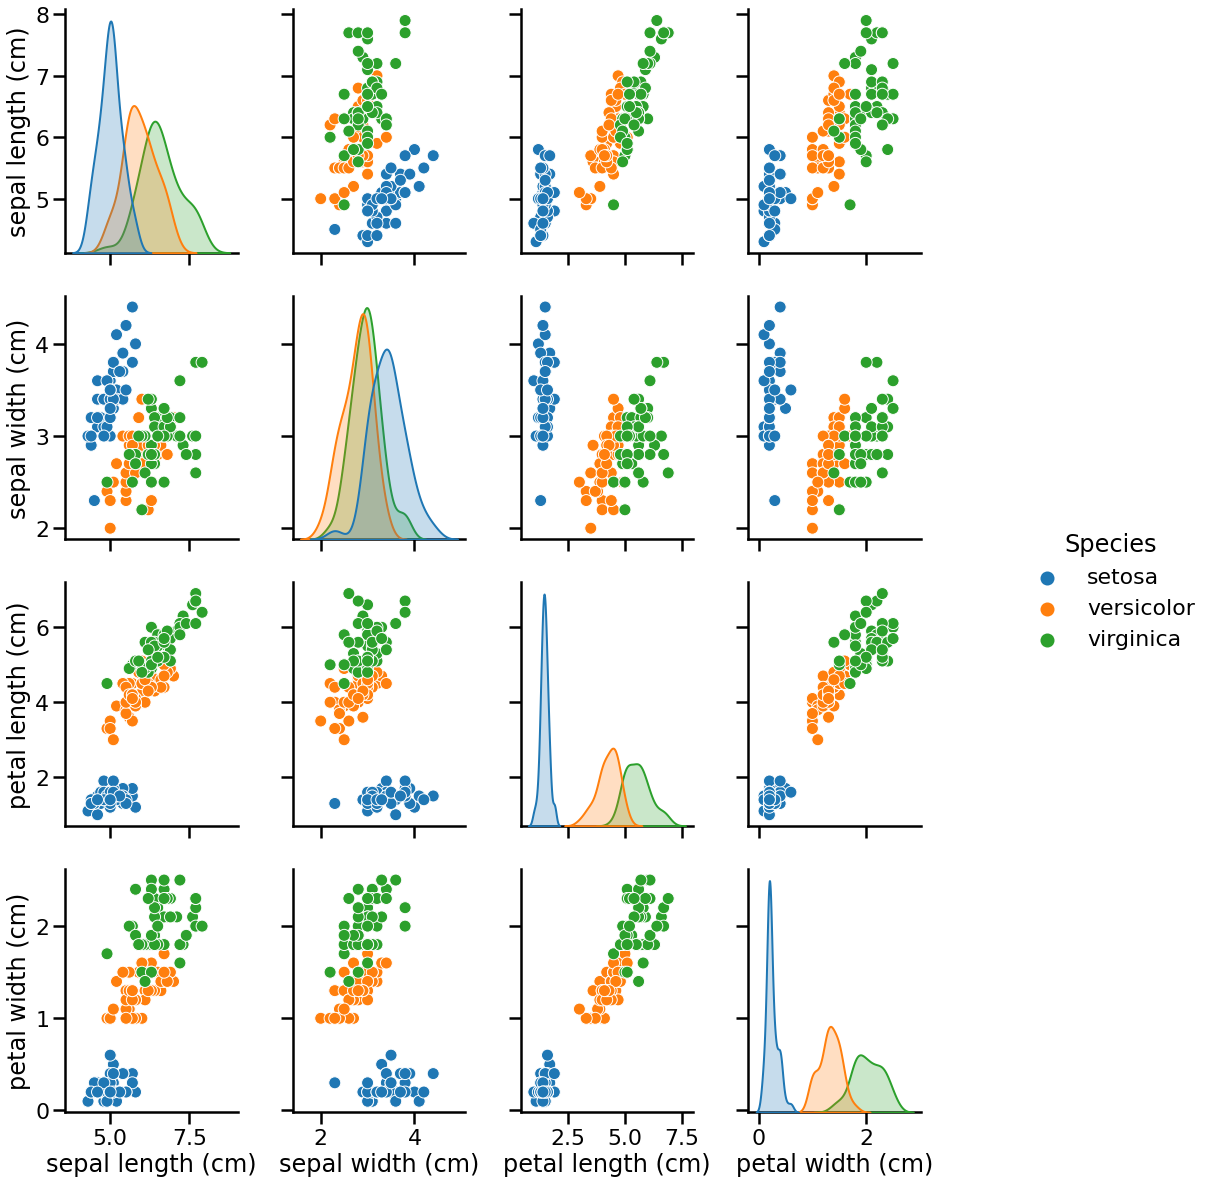

In [35]:
#Q2
iris_without_target = iris.drop('target', axis = 1)
pairplot= sns.pairplot(iris_without_target, hue = 'Species')
pairplot.figure.set_size_inches(18, 18)

# Q3: Create correlation heatmap 


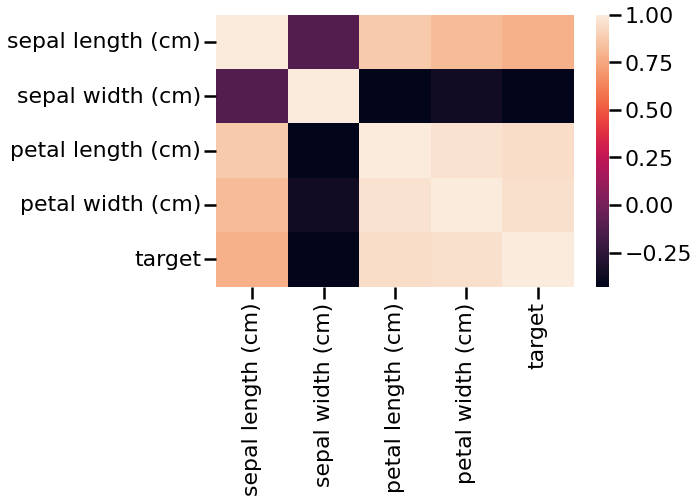

In [36]:
#Q3
htmp= sns.heatmap(iris.corr())
htmp.figure.set_size_inches(8, 5)


## Q4: Clustering

Cluster the records using k-means. Choose the number of clusters and explain why did you choose this number

In [37]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
from sklearn.cluster import KMeans

iris_clust=iris.iloc[:,0:4] #data set of only features
#Q4

km = KMeans(n_clusters=3, random_state=0).fit(iris_clust)
clusters = km.labels_.tolist()
#We chose this number becuase we have 3 flowers in the data set

In [39]:
iris_clust

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Q5: TSNE - 3d
Use tsne to visualize the results of the clustering. Write your insights about the clusters (which groups were created)
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [40]:
tsne_3d = TSNE(n_components=3)
projections = tsne_3d.fit_transform(iris_clust )
projections=pd.DataFrame(projections,columns=['x','y','z'])
projections['label']=iris['Species']
x=projections['x']
y=projections['y']
z=projections['z']
px.scatter_3d(projections, x='x', y='y', z='z',color="label" ,width=1000, height=800)
# The model created the groups according to the labels : setosa, versicolor, virginica


In [41]:
projections

,x,y,z,label
0,-14.527654,-21.132509,96.787987,setosa
1,-99.228180,-7.469419,41.540443,setosa
2,-90.504066,-82.194527,90.064400,setosa
3,-104.386230,-7.666839,126.508011,setosa
4,-62.164112,-88.662170,-0.719833,setosa
...,...,...,...,...
145,1.257662,71.420685,-85.215569,virginica
146,-4.607037,-18.445702,-104.537514,virginica
147,-42.926952,1.123226,-88.099564,virginica
148,-55.720753,141.247940,-27.791224,virginica


# Q6: TSNE - 2d
Use tsne to visualize the results of the clustering. Write your insights about the clusters (which groups were created)

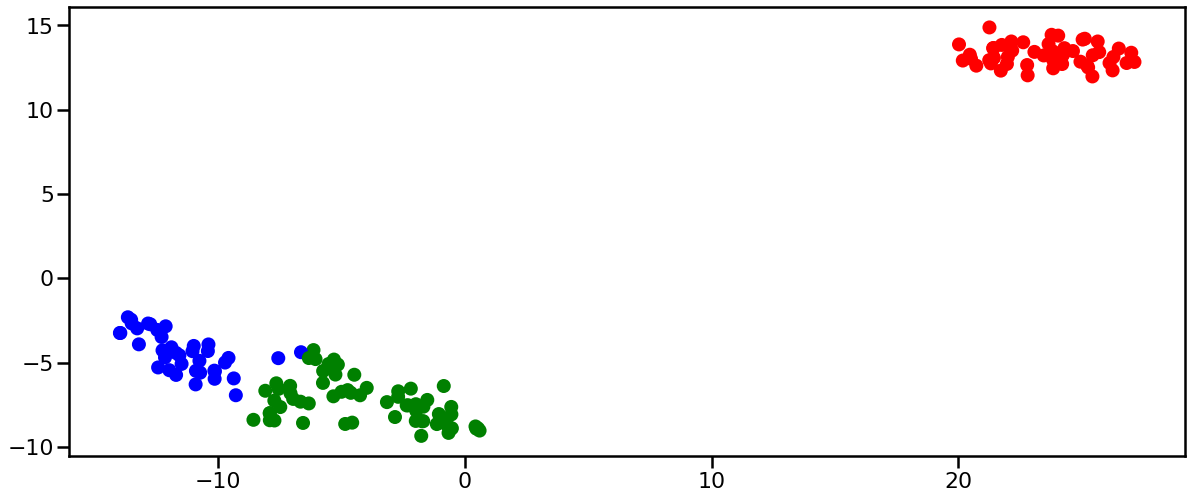

In [42]:
tsne = TSNE(n_components=2)
results_tsne = tsne.fit(iris_clust)

coords = results_tsne.embedding_

colors = ['blue','red','green']
label_colors = [colors[i] for i in clusters]
plt.figure(figsize=(20,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c=label_colors
    )

# The model created the groups according to the labels : setosa, versicolor, virginica

## Q7: 
7a. In the pairplot which features seem to be correlated?

7b. What is the advantage of using 3d plot instead of 2d in this case?

In [43]:
#7a
#petal width and petal length for versicolor and virginica
#petal length and sepal length for versicolor and virginica
#for setosa flowers, it's features are not corralted, you can tell it by the vertical line  

#7b 
# In 3d we have another options to cluster a group according to the z axis, if in 2d we have dots that are one upon each other
# in 3d we can seprate them to 2 different clusters 

## Q8: Hierarchical clustering
Create a Hierarchical Clustering of the data

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [44]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

iris_clust_transposed =  iris_clust.transpose()
x = iris_clust_transposed

res = pairwise_distances(x, metric='correlation') # cosine / jaccard / correlation / euclidean

distance = pd.DataFrame(res, index=iris_clust_transposed.index, 
                        columns= iris_clust_transposed.index)

distance

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.000000,1.117570,0.128246,0.182059
sepal width (cm),1.117570,0.000000,1.428440,1.366126
petal length (cm),0.128246,1.428440,0.000000,0.037135
petal width (cm),0.182059,1.366126,0.037135,0.000000


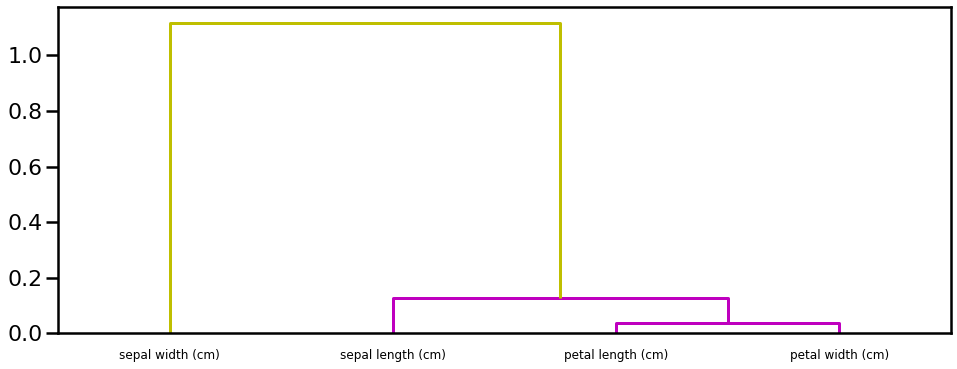

In [45]:
#Q8
import scipy
from scipy.cluster import hierarchy

labels = distance.index.values.tolist()
sq_distance = scipy.spatial.distance.squareform(distance)

Z = hierarchy.linkage(sq_distance, 'single')
#plt.figure()
#dn = hierarchy.dendrogram(Z)

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top', labels=labels)
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=labels)
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right', labels=labels)
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()